# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import qr

In [59]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]
x = np.asarray(x)
y = np.asarray(y)

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [60]:
def least_sqares(x, y, m):
    x_array = np.asarray(x)
    y_array = np.asarray(y)
    X = np.zeros((x_array.shape[0], m + 1))
    for i in range(m + 1):
        X[:, i] = x_array ** i
    return ((np.linalg.inv((X.T @ X)) @ X.T) @ y_array)

In [61]:
def create_polinom(x, coeff):
    result = np.zeros_like(x)
    for i in range(coeff.size):
        result += (coeff[i] * (x ** i))
    return result

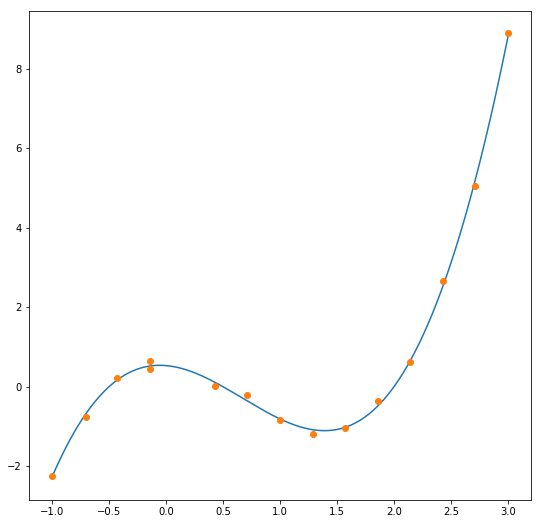

In [99]:
m = 5
coeff = least_sqares(x, y, m)
x_full = np.linspace(x.min(), x.max(), 10**3)

plt.figure(figsize=(9, 9))
plt.plot(x_full, create_polinom(x_full, coeff))
plt.plot(x, y,'o')
plt.show()


Хорошо ложится на точки

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [63]:
def sigma(p, y, m):
    n = y.shape[0]
    return np.sqrt(1 / (n - m) * np.sum((p - y) ** 2))

In [82]:
def optimal_m(x, y, eps=1e-6):
    x = np.asarray(x)
    y = np.asarray(y)
    m = -1
    sigma_new = np.inf
    for i in range(y.shape[0]):
        sigma_old = sigma_new
        m += 1
        coeff = least_sqares(x, y, m)
        sigma_new = sigma(create_polinom(x, coeff), y, m)
        if (sigma_new - sigma_old > - eps):
            return m - 1
    return m

In [83]:
best_m = optimal_m(x, y)
best_coeff = least_sqares(x, y, best_m)
print('Оптимум m = ',best_m)

Оптимум m =  4


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

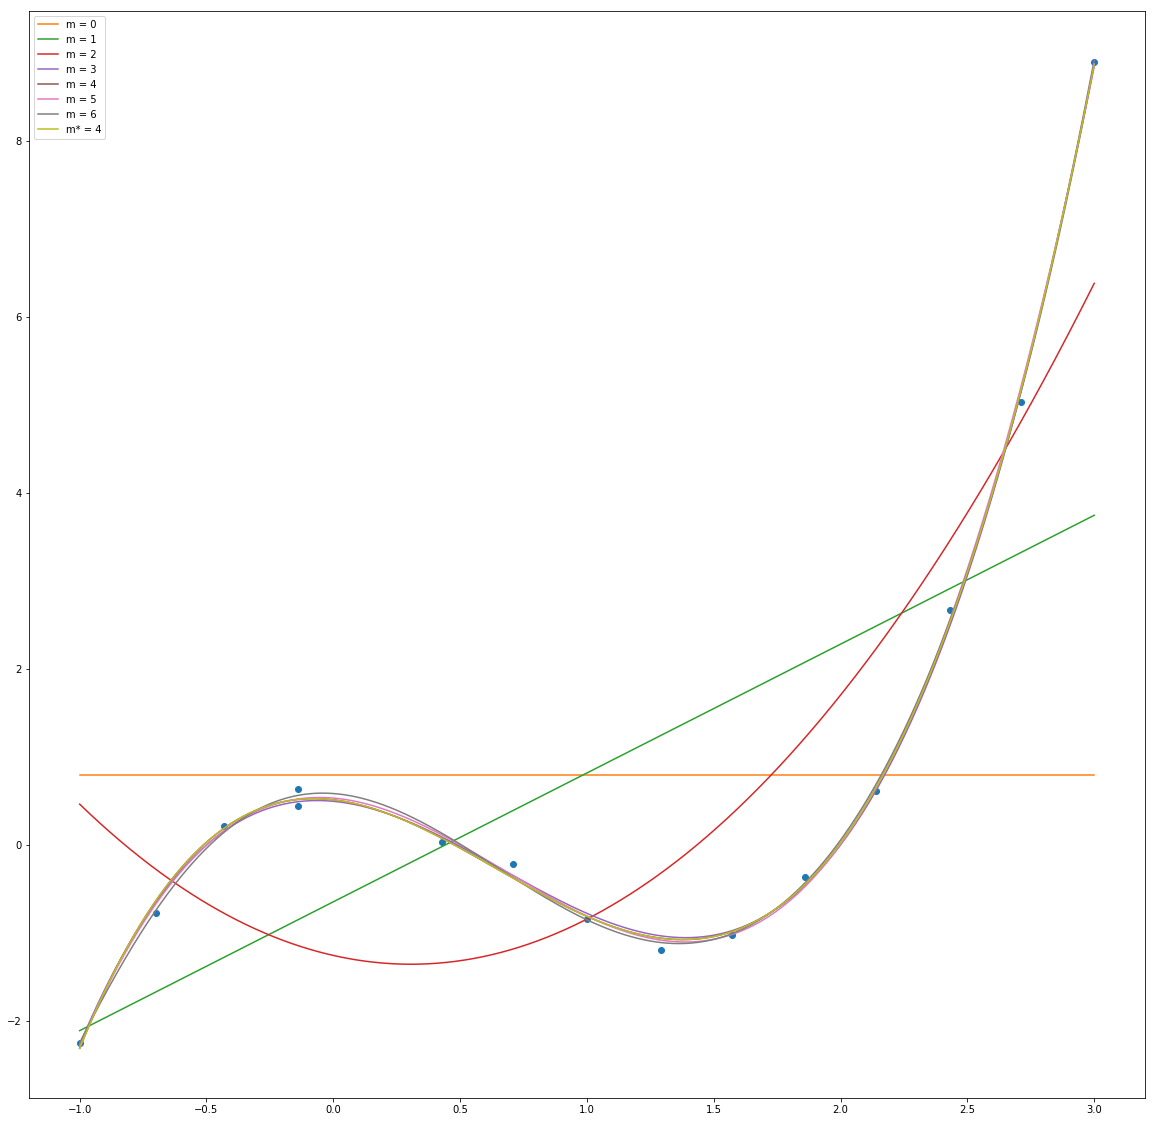

In [85]:
plt.figure(figsize=(20, 20))
plt.plot(x, y, 'o')
if y.shape[0] > (best_m + 2):
    max_m = best_m + 3
else: 
    max_m = y.shape[0]
for i in range(max_m):
    coeff = least_sqares(x, y, i)
    plt.plot(x_full, create_polinom(x_full, coeff), '-', label='m = {}'.format(i))
plt.plot(x_full, create_polinom(x_full, best_coeff), '-', label='m* = 4')
plt.legend()
plt.show()


Действительно хорошо ложится на точки 

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [86]:
def least_squares_enh(x, y, m):
    x_array = np.asarray(x)
    y_array = np.asarray(y)
    X = np.zeros((x_array.shape[0], m + 1))
    for i in range(m + 1):
        X[:, i] = x_array ** i
    q, r = qr(X)
    return (np.linalg.inv(r) @ q.T @ y)

In [87]:
np.linalg.norm(least_squares_enh(x, y, 4) - least_sqares(x, y, 4))

1.696301708208666e-13

Значения очень похожи

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [89]:
def f(x):
    return x ** 2 * np.cos(x)

In [90]:
def basis_polynome(x, x0, y0, j):
    l = np.ones_like(x)
    for i in range(x0.size):
        if (i != j):
            l *= (x - x0[i]) / (x0[j] - x0[i])
    return l
 
def lagrange_polynome(x, x0, y0):
    x = np.asarray(x)
    x0 = np.asarray(x0)
    y0 = np.asarray(y0)
    L = 0
    for j in range(x0.size):
        L += y0[j] * basis_polynome(x, x0, y0, j)
    return L

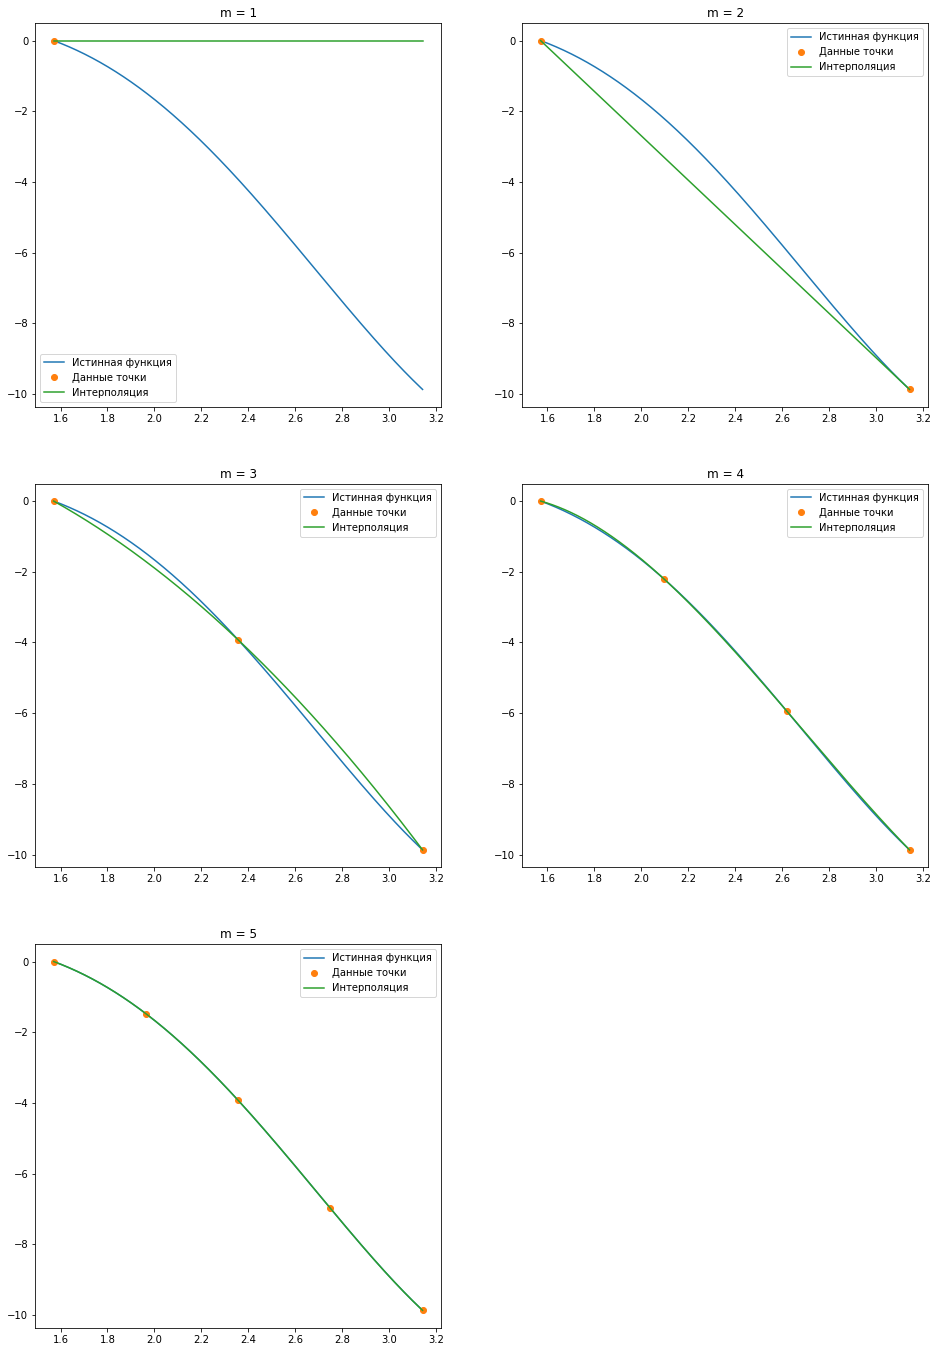

In [97]:
x_arr = np.linspace(np.pi / 2 , np.pi, int(1e3))
plt.figure(figsize=(16, 24))
for m in range(1, 6):
    x_dots = np.linspace(np.pi / 2 , np.pi, int(m))
    y_dots = f(x_dots)
    plt.subplot(3, 2, m)
    plt.plot(x_arr, f(x_arr), '-', label='Истинная функция')
    plt.plot(x_dots, y_dots, 'o', label='Данные точки')
    plt.plot(x_arr, lagrange_polynome(x_arr, x_dots, y_dots), label='Интерполяция')
    plt.title('m = {}'.format(m))
    plt.legend()
plt.show()


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

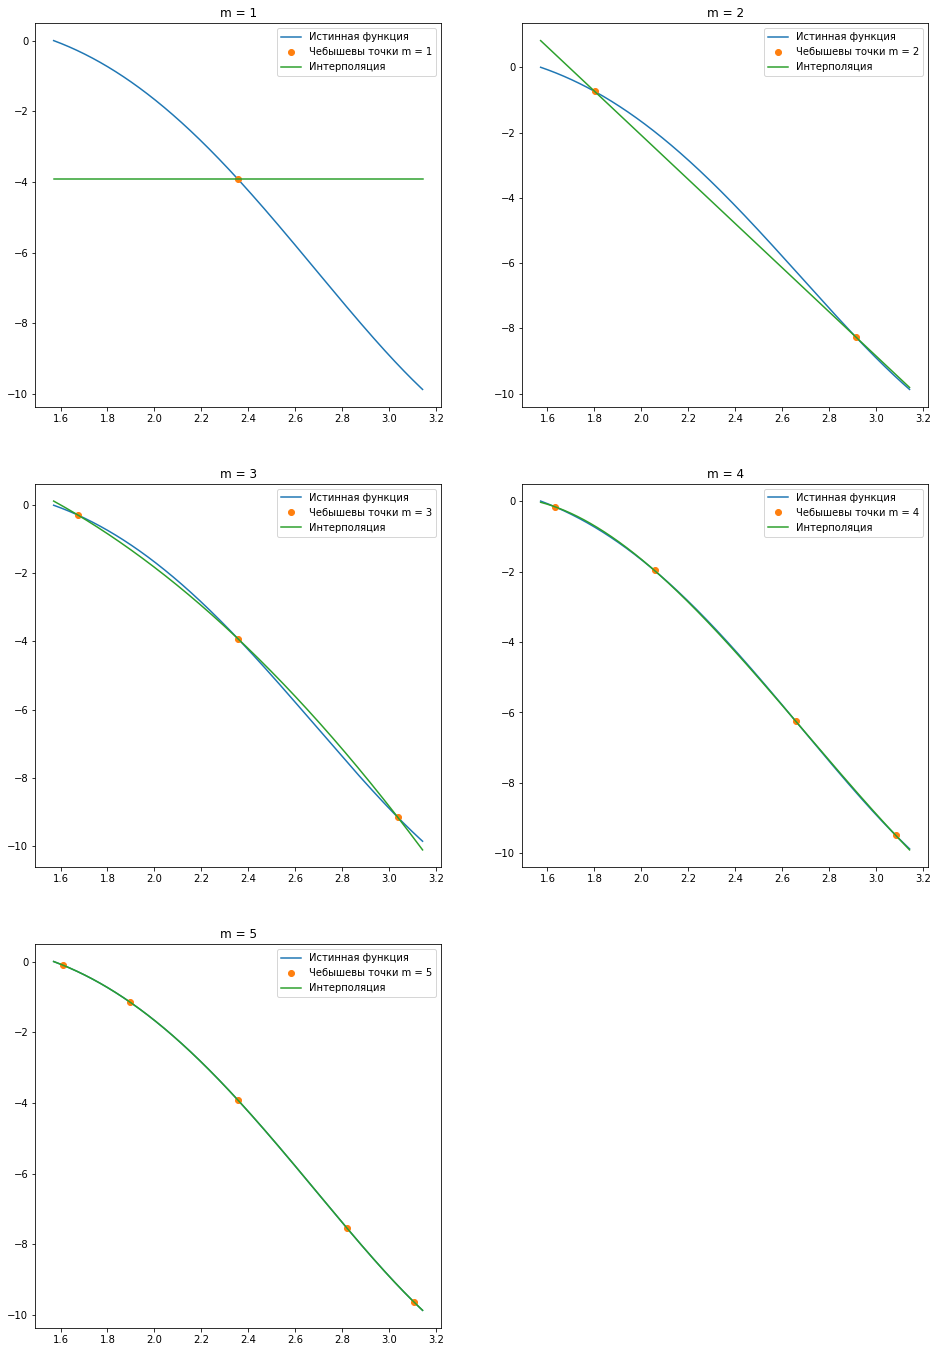

In [98]:
x_arr = np.linspace(np.pi / 2 , np.pi, int(1e3))
plt.figure(figsize=(16, 24))
for m in range(1, 6):
    x_cheb = (np.pi / 2 + np.pi) / 2 + (np.pi - np.pi / 2) / 2 * np.cos((2 * np.arange(1, m + 1) - 1) / (2 * m) * np.pi)
    y_cheb = f(x_cheb)
    plt.subplot(3, 2, m)
    plt.plot(x_arr, f(x_arr), '-', label='Истинная функция')
    plt.plot(x_cheb, y_cheb, 'o', label='Чебышевы точки m = {}'.format(m))
    plt.plot(x_arr, lagrange_polynome(x_arr, x_cheb, y_cheb), label='Интерполяция')
    plt.title('m = {}'.format(m))
    plt.legend()
plt.show()


Узлы чебышева улучшаяют интерполяцию